# Project Idea: Optimizing New Customer Acquisition Channels for Scotiabank

## The Problem/Opportunity:
Scotiabank wants to efficiently spend its marketing budget to attract new customers. They acquire customers through various channels (like online ads, referrals from existing customers, walk-ins to branches, social media campaigns, etc.). The goal is to understand which of these channels are most effective and to predict which "leads" (potential customers) are most likely to convert into actual Scotiabank customers. This way, they can focus their efforts and resources on the most promising leads and channels.

## Why is this important for Scotiabank?

### Maximizing ROI: Get the most new customers for their marketing dollars.
### Targeted Marketing: Identify high-potential leads for specialized follow-up.
### Strategic Planning: Understand which channels to invest more in.

### How we'll solve it:

1. Collect "Lead" Data: Imagine we have a record for each person who showed interest in Scotiabank (a "lead"). This record includes:

Where they came from: (e.g., Google Ad, Scotiabank website, friend referral, branch visit). This is our acquisition channel.

Who they are: (e.g., age, income, where they live).

How they interacted: (e.g., how many times they visited the website, what products they were interested in).

The Big Question: Did they actually open an account with Scotiabank within a certain time frame? (This is our "Converted" or "Not Converted" answer).



2. Analyze the Data (with Python):

We'll use this data to see if people from certain channels, or with certain characteristics, are more likely to convert.

We'll build a Classification Model to predict if a new lead will convert (Yes/No).

We'll also build a Regression Model to predict the potential value of that new customer (e.g., how much money they might bring to the bank over time).


3. Visualize the Findings (with Tableau):

Create dashboards showing which channels have the highest conversion rates.

Show characteristics of high-value customers.

Display a list of "hot leads" that sales teams should prioritize.

### Dataset Features We'll Include:

1. LeadID: Unique identifier for each potential customer.
2. LeadSource: The marketing/acquisition channel (e.g., 'Online Ad', 'Referral', 'Branch Walk-in', 'Social Media', 'Partnership').
3. Age: Age of the lead.
4. Income: Annual income.
5. Province: Canadian province (Scotiabank focus).
6. InitialProductInterest: What product they initially showed interest in (e.g., 'Chequing Account', 'Credit Card', 'Mortgage', 'Investment').
7. WebsiteVisits_PreConversion: Number of times they visited the bank's website before a decision.
8. TimeOnWebsite_Minutes: Total time spent on the website.
9. EmailOpenedCount: How many marketing emails they opened.
10. DaysSinceInquiry: How many days since they first inquired.
11. CallCenterInquiries: Number of times they called the call center.

##### Target Variable 1 (Classification): IsConvertedToCustomer (1 if they opened an account, 0 otherwise). We'll set up rules so certain lead sources, higher income, more interactions, etc., make conversion more likely.
##### Target Variable 2 (Regression): PredictedCustomerLifetimeValue (CLTV) - a simulated value of how profitable they might be.

In [1]:
import pandas as pd
import numpy as np
import random

np.random.seed(42)
n= 10000

#Lead sources with some typos and inconsistencies
lead_sources = ['Online Ad', 'online ad', 'Referral', 'Refferal', 'Branch Walk-in', 'Walk-in','Social Media', 'Social_Media', 'Partnership']

# Provinces with some typos
provinces = ['ON', 'QC', 'BC', 'AB', 'M.B.', 'NOVA SCOTIA', 'NB']

# Products (with capital/lowercase inconsistencies)
products = ['Chequing account', 'chequing Account', 'Credit Card', 'credit card', 'Mortgage', 'mortgaje', 'Investment']

# Generate the data
data = pd.DataFrame({
    'LeadID': np.arange(1, n+1),
    'LeadSource': np.random.choice(lead_sources, n),
    'Age': np.random.normal(40, 12, n).round(1),  # with some outliers
    'Income': np.random.normal(65000, 20000, n).round(2),
    'Province': np.random.choice(provinces, n),
    'InitialProductInterest': np.random.choice(products, n),
    'WebsiteVisits_PreConversion': np.random.poisson(4, n),
    'TimeOnWebsite_Minutes': np.random.normal(30, 15, n).round(1),
    'EmailOpenedCount': np.random.randint(0, 10, n),
    'DaysSinceInquiry': np.random.randint(0, 30, n),
    'CallCenterInquiries': np.random.randint(0, 5, n),
    'MarketingNotes': np.random.choice(['Interested', 'Callback', 'Spam', 'Wrong number', None], n),
})

# Add realistic but ultimately irrelevant or redundant columns
data['SignupDate'] = pd.to_datetime('2024-01-01') + pd.to_timedelta(np.random.randint(0, 120, size=len(data)), unit='D')
data['MarketingSourceID'] = np.random.randint(1000, 9999, size=len(data))  # random ID, not meaningful
data['TempNotes'] = np.random.choice(['-', 'None', 'Call Later', 'Interested', 'Wrong Info'], size=len(data))  # junk text notes
data['DuplicateLead'] = np.random.choice([0, 1], size=len(data), p=[0.95, 0.05])  # could be interesting, but most are 0
data['ZipCode'] = np.random.randint(10000, 99999, size=len(data))  # random ZIPs, not necessarily tied to provinces

# Add Missing Values
for col in ['Income', 'Age', 'InitialProductInterest']:
    data.loc[data.sample(frac=0.05).index, col] = np.nan

# Introduce duplicate rows
duplicates = data.sample(10)
data = pd.concat([data, duplicates], ignore_index=True)

# Create target column with realistic noise
data['IsConvertedToCustomer'] = np.where(
    (data['Income'] > 60000) & 
    (data['WebsiteVisits_PreConversion'] > 3) & 
    (data['EmailOpenedCount'] > 2), 1, 0)

# Add CLTV only for converted customers
data['PredictedCustomerLifetimeValue'] = np.where(
    data['IsConvertedToCustomer'] == 1,
    np.random.normal(12000, 3000, len(data)).round(2),
    0
)

data.head()

,LeadID,LeadSource,Age,Income,Province,InitialProductInterest,WebsiteVisits_PreConversion,TimeOnWebsite_Minutes,EmailOpenedCount,DaysSinceInquiry,CallCenterInquiries,MarketingNotes,SignupDate,MarketingSourceID,TempNotes,DuplicateLead,ZipCode,IsConvertedToCustomer,PredictedCustomerLifetimeValue
0,1,Social Media,30.4,53156.92,M.B.,Chequing account,4,45.0,5,8,4,None,2024-01-15,3472,None,0,13055,0,0.0
1,2,Refferal,36.5,45279.05,NOVA SCOTIA,Chequing account,4,18.5,6,14,4,Interested,2024-01-19,5534,None,1,38356,0,0.0
2,3,Social_Media,59.4,49846.04,BC,Credit Card,3,25.5,3,21,3,Interested,2024-01-14,9676,Wrong Info,0,15038,0,0.0
3,4,Branch Walk-in,33.2,NaN,M.B.,Credit Card,6,45.2,7,13,1,Interested,2024-03-06,7073,-,0,89731,0,0.0
4,5,Social Media,38.0,NaN,AB,NaN,4,26.5,4,14,2,Interested,2024-02-14,7620,None,0,15641,0,0.0


In [2]:
# Adding realistic but ultimately irrelevant or redundant columns
data['SignupDate'] = pd.to_datetime('2024-01-01') + pd.to_timedelta(np.random.randint(0, 120, size=len(data)), unit='D')
data['MarketingSourceID'] = np.random.randint(1000, 9999, size=len(data))  # random ID, not meaningful
data['TempNotes'] = np.random.choice(['-', 'None', 'Call Later', 'Interested', 'Wrong Info'], size=len(data))  # junk text notes
data['DuplicateLead'] = np.random.choice([0, 1], size=len(data), p=[0.95, 0.05])  # could be interesting, but most are 0
data['ZipCode'] = np.random.randint(10000, 99999, size=len(data))  # random ZIPs, not necessarily tied to provinces

data.head()

,LeadID,LeadSource,Age,Income,Province,InitialProductInterest,WebsiteVisits_PreConversion,TimeOnWebsite_Minutes,EmailOpenedCount,DaysSinceInquiry,CallCenterInquiries,MarketingNotes,SignupDate,MarketingSourceID,TempNotes,DuplicateLead,ZipCode,IsConvertedToCustomer,PredictedCustomerLifetimeValue
0,1,Social Media,30.4,53156.92,M.B.,Chequing account,4,45.0,5,8,4,None,2024-01-26,5821,Wrong Info,0,92810,0,0.0
1,2,Refferal,36.5,45279.05,NOVA SCOTIA,Chequing account,4,18.5,6,14,4,Interested,2024-02-07,9041,-,0,50210,0,0.0
2,3,Social_Media,59.4,49846.04,BC,Credit Card,3,25.5,3,21,3,Interested,2024-01-19,5733,Wrong Info,0,88939,0,0.0
3,4,Branch Walk-in,33.2,NaN,M.B.,Credit Card,6,45.2,7,13,1,Interested,2024-01-31,1445,Wrong Info,0,51743,0,0.0
4,5,Social Media,38.0,NaN,AB,NaN,4,26.5,4,14,2,Interested,2024-02-06,4697,Wrong Info,0,67744,0,0.0


In [3]:
#Understanding my dataset first:
#Existing Columns, missing data, are datatypes correct (e.g., dates as datetime, income as numeric), duplicate columns, junk columns, etc
data.head()
data.info()
data.describe()
data.nunique()
data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10010 entries, 0 to 10009
Data columns (total 19 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   LeadID                          10010 non-null  int32         
 1   LeadSource                      10010 non-null  object        
 2   Age                             9509 non-null   float64       
 3   Income                          9510 non-null   float64       
 4   Province                        10010 non-null  object        
 5   InitialProductInterest          9510 non-null   object        
 6   WebsiteVisits_PreConversion     10010 non-null  int32         
 7   TimeOnWebsite_Minutes           10010 non-null  float64       
 8   EmailOpenedCount                10010 non-null  int32         
 9   DaysSinceInquiry                10010 non-null  int32         
 10  CallCenterInquiries             10010 non-null  int32         
 11  Ma

LeadID                               0
LeadSource                           0
Age                                501
Income                             500
Province                             0
InitialProductInterest             500
WebsiteVisits_PreConversion          0
TimeOnWebsite_Minutes                0
EmailOpenedCount                     0
DaysSinceInquiry                     0
CallCenterInquiries                  0
MarketingNotes                    1919
SignupDate                           0
MarketingSourceID                    0
TempNotes                            0
DuplicateLead                        0
ZipCode                              0
IsConvertedToCustomer                0
PredictedCustomerLifetimeValue       0
dtype: int64

## Data Understanding –> Why It Matters

Think of this step like meeting your leads in person before making any decisions. You wouldn’t plan a marketing strategy without knowing who your customers are, right?

Here’s what we aim to achieve:

Get to know our data “characters” –> What each column represents, which ones are numeric vs categorical, and what kind of stories they might tell.

Spot potential issues early –> Missing data, duplicates, or weird values can mislead your analysis. Better to see them now than after building models.

Plan meaningful analysis –> Understanding your data guides which visualizations and ML techniques make sense later.

In short: This step sets the stage so all insights and predictions are meaningful and reliable.

Key Questions to Ask About Your Dataset

When exploring your data, you want to answer these types of questions:

Data types:

Are numeric fields actually numeric?

Are categorical fields stored as strings or codes?

Example: Is Income a number or text like “$50k”?

Size and structure:

How many leads do we have?

How many columns/features?

Example: Do we have 1,000 leads or 100,000? This affects how we visualize.

Missing values:

Which columns have missing data, and how much?

Example: If Income is missing 30% of the time, that’s significant.

Duplicates:

Are there repeated rows or leads with the same LeadID?

Duplicate entries can inflate conversion rates or skew trends.

Basic statistics (summary):

For numeric fields: mean, median, min, max, standard deviation.

For categorical fields: counts of each category.

This gives a quick sense of distributions and potential outliers.

Story hints:

Early trends can emerge here, e.g., “Leads from social media tend to have lower income but higher conversion potential.”

These are small hints we’ll investigate more deeply in EDA.

Minimal Python Examples

Here’s how we start exploring without getting overwhelmed:

 Import libraries
import pandas as pd

 Load dataset
df = pd.read_csv('bank_leads_dataset.csv')

 1. Check the first few rows to see the data
df.head()


This is like peeking at the first few leads to see what kind of information we have.

 2. Quick overview of data types and missing values
df.info()


This tells us which columns are numeric, categorical, and how many missing entries exist.

 3. Basic statistics for numeric columns
df.describe()


Gives insight like average income, typical website visit time, and max/min transaction amounts.

 4. Check unique values for a categorical column
df['LeadSource'].value_counts()


Shows which channels bring in most leads. It's a sneak peek for later channel analysis.

✅ At the end of this step, we want to have answers to these questions:

How clean or messy is our data?

Which columns might need special attention?

Any quick trends that jump out?

This prepares us perfectly for Step 3: Data Cleaning, where we fix these issues before analysis.

# Key Observations:
## Missing Data:

Age: 501 missing → could be real-world data issue

Income: 500 missing → maybe sensitive data

InitialProductInterest: 500 missing

MarketingNotes: 1919 missing → likely not critical

✅ All other columns are full

## Data Types:

LeadID, ZipCode, MarketingSourceID are probably identifiers, not numeric values for modeling.

SignupDate is in datetime64, which is good — we can engineer “days since signup”.

MarketingNotes, TempNotes look like junk columns.


In [4]:
#Checking Uniqueness
data.nunique().sort_values()

DuplicateLead                         2
IsConvertedToCustomer                 2
MarketingNotes                        4
CallCenterInquiries                   5
TempNotes                             5
Province                              7
InitialProductInterest                7
LeadSource                            9
EmailOpenedCount                     10
WebsiteVisits_PreConversion          14
DaysSinceInquiry                     30
SignupDate                          120
Age                                 669
TimeOnWebsite_Minutes               811
PredictedCustomerLifetimeValue     2310
MarketingSourceID                  6030
ZipCode                            9468
Income                             9496
LeadID                            10000
dtype: int64

In [5]:
#Checking if the datetime is actually in datetime format
print(data['SignupDate'].dtype)

datetime64[ns]


# Data Cleaning

In [6]:
#Rounding up age cause it contains decimal values
data['Age'] = data['Age'].round()

#Creating missing indicator columns for Age and Income
data['Age_Missing'] = data['Age'].isnull().astype(int)
data['Income_Missing'] = data['Income'].isnull().astype(int)

#Filling Initial Product Interest column with 'unknown' for null values
data['InitialProductInterest'] = data['InitialProductInterest'].fillna('Unknown')

In [7]:
#Cleaning and transforming Date Columns

from datetime import datetime

# Calculate days since signup
today = pd.to_datetime("today")
data['DaysSinceSignup'] = (today - data['SignupDate']).dt.days

In [8]:
#Cleaning categorical and text columns

#Starting with Province

data['Province'] = data['Province'].str.upper().str.strip() #Converting everything to uppercase and stripping spaces

#Now, creating a mapping dictionary to map all possible versions into one standard
province_map = {
    'ONTARIO': 'ON', 'ON': 'ON', 'ONT.': 'ON',
    'BRITISH COLUMBIA': 'BC', 'BC': 'BC',
    'ALBERTA': 'AB', 'AB': 'AB',
    'QUEBEC': 'QC', 'QC': 'QC',
    'MANITOBA': 'MB', 'MB': 'MB', 'M.B.': 'MB',
    'SASKATCHEWAN': 'SK', 'SK': 'SK',
    'NEW BRUNSWICK': 'NB', 'NB': 'NB',
    'NOVA SCOTIA': 'NS', 'NS': 'NS',
    'NEWFOUNDLAND': 'NL', 'NL': 'NL',
    'PRINCE EDWARD ISLAND': 'PE', 'PEI': 'PE', 'PE': 'PE',
    'YUKON': 'YT', 'YT': 'YT',
    'NORTHWEST TERRITORIES': 'NT', 'NWT': 'NT', 'NT': 'NT',
    'NUNAVUT': 'NU', 'NU': 'NU'
}

data['Province'] = data['Province'].replace(province_map)

In [9]:
print(data['Province'].unique())

['MB' 'NS' 'BC' 'AB' 'ON' 'NB' 'QC']


In [10]:
#LeadSource values

data['LeadSource'] = data['LeadSource'].str.strip().str.lower() #Stripping spaces and making everything lowercase for consistency

# Mapping inconsistent entries to a single standard value
mapping = {
    'social media': 'Social Media',
    'social_media': 'Social Media',
    'referral': 'Referral',
    'refferal': 'Referral',   # typo fixed
    'branch walk-in': 'Branch Walk-in',
    'walk-in': 'Branch Walk-in',
    'online ad': 'Online Ad',
    'partnership': 'Partnership'
}

data['LeadSource'] = data['LeadSource'].map(mapping) # Applying the mapping

print(data['LeadSource'].unique())

['Social Media' 'Referral' 'Branch Walk-in' 'Online Ad' 'Partnership']


In [11]:
#InitialProductInterest

data['InitialProductInterest'] = data['InitialProductInterest'].str.strip().str.lower()

product_mapping = {
    'chequing account': 'Chequing Account',
    'chequing account': 'Chequing Account',
    'credit card': 'Credit Card',
    'investment': 'Investment',
    'mortgage': 'Mortgage',
    'mortgaje': 'Mortgage',   # typo fixed
    'unknown': 'Unknown'
}

data['InitialProductInterest'] = data['InitialProductInterest'].map(product_mapping)

print(data['InitialProductInterest'].unique())

['Chequing Account' 'Credit Card' 'Unknown' 'Investment' 'Mortgage']


In [12]:
# Replacing dashes, blanks, and 'none' with NaN for the column tempnotes
data['TempNotes'] = data['TempNotes'].replace(['-', 'none', 'None', 'N/A', ''], np.nan)

In [13]:
#Dropping irrelevant columns like marketingsourceID and DuplicateLead
data = data.drop(columns=['MarketingSourceID', 'DuplicateLead'])

In [14]:
# OUTLIER HANDLING: CAPPING + FLAGGING
# Function to cap and flag outliers using IQR method
def cap_and_flag_outliers(df, column):
    # 1. Calculate Q1, Q3 and IQR
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    # 2. Define lower and upper bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # 3. Create a flag column (1 = outlier, 0 = normal)
    df[column + '_Outlier'] = ((df[column] < lower_bound) | (df[column] > upper_bound)).astype(int)

    # 4. Create a capped version of the column
    df[column + '_Capped'] = df[column].clip(lower=lower_bound, upper=upper_bound)

#Printing summary for quick understanding
    print(f"{column}:")
    print(f"  Q1 = {Q1:.2f}, Q3 = {Q3:.2f}, IQR = {IQR:.2f}")
    print(f"  Lower Bound = {lower_bound:.2f}, Upper Bound = {upper_bound:.2f}")
    print(f"  Outliers flagged: {df[column + '_Outlier'].sum()}")
    print("-" * 40)

    return df


# Now, applying to the four key numeric columns that might contain outliers

# 1. Income
data = cap_and_flag_outliers(data, 'Income')

# 2. Age
data = cap_and_flag_outliers(data, 'Age')

# 3. Website Visits
data = cap_and_flag_outliers(data, 'WebsiteVisits_PreConversion')

# 4. Time Spent on Website
data = cap_and_flag_outliers(data, 'TimeOnWebsite_Minutes')

Income:
  Q1 = 51509.18, Q3 = 78694.61, IQR = 27185.43
  Lower Bound = 10731.02, Upper Bound = 119472.76
  Outliers flagged: 56
----------------------------------------
Age:
  Q1 = 32.00, Q3 = 48.00, IQR = 16.00
  Lower Bound = 8.00, Upper Bound = 72.00
  Outliers flagged: 43
----------------------------------------
WebsiteVisits_PreConversion:
  Q1 = 3.00, Q3 = 5.00, IQR = 2.00
  Lower Bound = 0.00, Upper Bound = 8.00
  Outliers flagged: 223
----------------------------------------
TimeOnWebsite_Minutes:
  Q1 = 20.30, Q3 = 40.50, IQR = 20.20
  Lower Bound = -10.00, Upper Bound = 70.80
  Outliers flagged: 59
----------------------------------------


## Feature Engineering and Preparation

In [15]:
#Introducing Days Since Signup column to make the data more meaningful
today = pd.to_datetime("today")
data['DaysSinceSignup'] = (today - data['SignupDate']).dt.days

# Quick check
print(data[['SignupDate', 'DaysSinceSignup']].head())

  SignupDate  DaysSinceSignup
0 2024-01-26              608
1 2024-02-07              596
2 2024-01-19              615
3 2024-01-31              603
4 2024-02-06              597


In [16]:
data.head(30)

,LeadID,LeadSource,Age,Income,Province,InitialProductInterest,WebsiteVisits_PreConversion,TimeOnWebsite_Minutes,EmailOpenedCount,DaysSinceInquiry,...,Income_Missing,DaysSinceSignup,Income_Outlier,Income_Capped,Age_Outlier,Age_Capped,WebsiteVisits_PreConversion_Outlier,WebsiteVisits_PreConversion_Capped,TimeOnWebsite_Minutes_Outlier,TimeOnWebsite_Minutes_Capped
0,1,Social Media,30.0,53156.92,MB,Chequing Account,4,45.0,5,8,...,0,608,0,53156.92,0,30.0,0,4,0,45.0
1,2,Referral,36.0,45279.05,NS,Chequing Account,4,18.5,6,14,...,0,596,0,45279.05,0,36.0,0,4,0,18.5
2,3,Social Media,59.0,49846.04,BC,Credit Card,3,25.5,3,21,...,0,615,0,49846.04,0,59.0,0,3,0,25.5
3,4,Branch Walk-in,33.0,NaN,MB,Credit Card,6,45.2,7,13,...,1,603,0,NaN,0,33.0,0,6,0,45.2
4,5,Social Media,38.0,NaN,AB,Unknown,4,26.5,4,14,...,1,597,0,NaN,0,38.0,0,4,0,26.5
5,6,Referral,NaN,108098.36,ON,Investment,7,36.7,0,5,...,0,589,0,108098.36,0,NaN,0,7,0,36.7
6,7,Social Media,44.0,76548.32,NS,Investment,5,52.4,3,13,...,0,534,0,76548.32,0,44.0,0,5,0,52.4
7,8,Social Media,35.0,41443.19,NS,Mortgage,3,40.5,0,20,...,0,618,0,41443.19,0,35.0,0,3,0,40.5
8,9,Branch Walk-in,NaN,89833.02,AB,Mortgage,4,23.8,5,22,...,0,522,0,89833.02,0,NaN,0,4,0,23.8
9,10,Referral,35.0,74742.79,NB,Investment,4,36.7,5,28,...,0,532,0,74742.79,0,35.0,0,4,0,36.7


# Breakdown of the columns:

## Original / Raw Columns

LeadID → Unique identifier for each lead.

LeadSource → Where the lead came from (Social Media, Referral, Online Ad, etc.).

Age → Age of the potential customer (sometimes missing).

Income → Annual income of the potential customer (sometimes missing).

Province → Province in Canada where the lead is from.

InitialProductInterest → The first product the customer showed interest in (Chequing, Mortgage, Credit Card, etc.).

WebsiteVisits_PreConversion → Number of website visits before deciding to convert or not.

TimeOnWebsite_Minutes → Total time spent on Scotiabank’s website (before conversion decision).

EmailOpenedCount → Number of promotional/marketing emails opened by the lead.

DaysSinceInquiry → How many days ago the lead first inquired about Scotiabank.

## Engineered Columns

Income_Missing → Flag (1 if Income was missing, 0 if not). Helps track missingness as a signal.

DaysSinceSignup → Derived from SignupDate. How long ago they signed up. This captures customer recency.

## Outlier Handling Columns (per feature)

Each has two helper columns:

_Outlier → Binary flag: 1 if this record is an outlier for that feature, 0 otherwise.

_Capped → The adjusted (capped) version of the value so that extreme outliers don’t distort the dataset.

Examples:

Income_Outlier / Income_Capped → Flag + capped version of annual income.

Age_Outlier / Age_Capped → Flag + capped version of age.

WebsiteVisits_PreConversion_Outlier / WebsiteVisits_PreConversion_Capped → Same logic for number of website visits.

TimeOnWebsite_Minutes_Outlier / TimeOnWebsite_Minutes_Capped → Same for time spent on site.

## Notes:

Original values are kept so you can always go back.

The _Outlier flag helps test if outliers correlate with conversion (sometimes unusual data is meaningful).

The _Capped version is safe for modeling (no single crazy value dominates).

# EXPLORATORY DATA ANALYSIS (EDA)

## 1. Conversions by Channel (Bar Chart)

- To see which acquisition channels (Social Media, Referral, Walk-in, etc.) bring the most actual customers (not just leads).

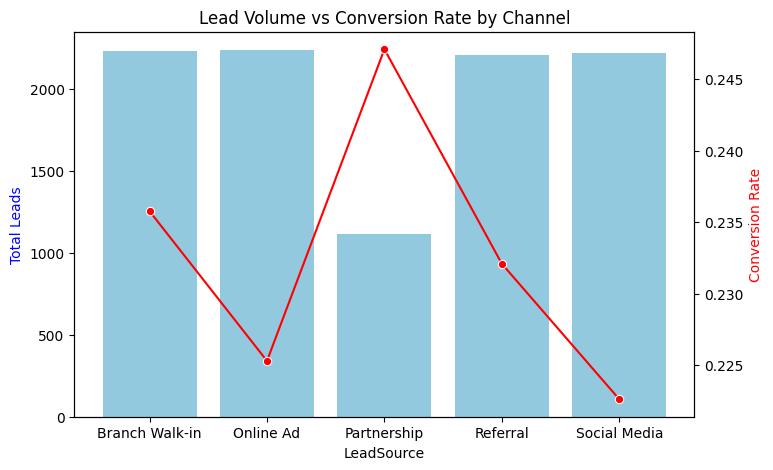

       LeadSource  Total_Leads  Conversion_Rate
2     Partnership         1117         0.247090
0  Branch Walk-in         2231         0.235769
3        Referral         2206         0.232094
1       Online Ad         2237         0.225302
4    Social Media         2219         0.222623


In [19]:
# Group data by channel
channel_summary = data.groupby('LeadSource').agg(
    Total_Leads=('LeadID', 'count'),
    Conversion_Rate=('IsConvertedToCustomer', 'mean')
).reset_index()

# Plot
fig, ax1 = plt.subplots(figsize=(8,5))

# Bar chart for total leads
sns.barplot(x='LeadSource', y='Total_Leads', data=channel_summary, ax=ax1, color="skyblue")
ax1.set_ylabel("Total Leads", color="blue")

# Line chart for conversion rate
ax2 = ax1.twinx()
sns.lineplot(x='LeadSource', y='Conversion_Rate', data=channel_summary, ax=ax2, marker="o", color="red")
ax2.set_ylabel("Conversion Rate", color="red")

plt.title("Lead Volume vs Conversion Rate by Channel")
plt.xticks(rotation=45)
plt.show()

# Print quick summary table
print(channel_summary.sort_values("Conversion_Rate", ascending=False))

### 📊 Lead Volume vs Conversion Rate by Channel

This chart compares the **number of leads** (blue bars) and the **conversion rate** (red line) for each acquisition channel.

**Key Takeaways:**
- **Partnerships** generate fewer leads but achieve the **highest conversion rate**, suggesting very high-quality referrals.  
- **Branch Walk-ins** deliver both strong lead volume and solid conversion, making it a consistently reliable channel.  
- **Social Media** and **Online Ads** bring in large numbers of leads but with **lower conversion rates**, indicating a need for better targeting or follow-up strategies.  

👉 Strategic Insight: Scotiabank could maximize ROI by investing more in high-performing channels like Partnerships and Branch Walk-ins, while optimizing ad spend and engagement tactics for Social Media and Online Ads.

## 2. Correlation Heatmap (Numeric Features)

- To check which variables (like Age, Income, Website Visits, Time on Website) are correlated with conversions or with each other.

C:\Users\beeka\AppData\Local\Temp\ipykernel_24400\4113808286.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data.corr()


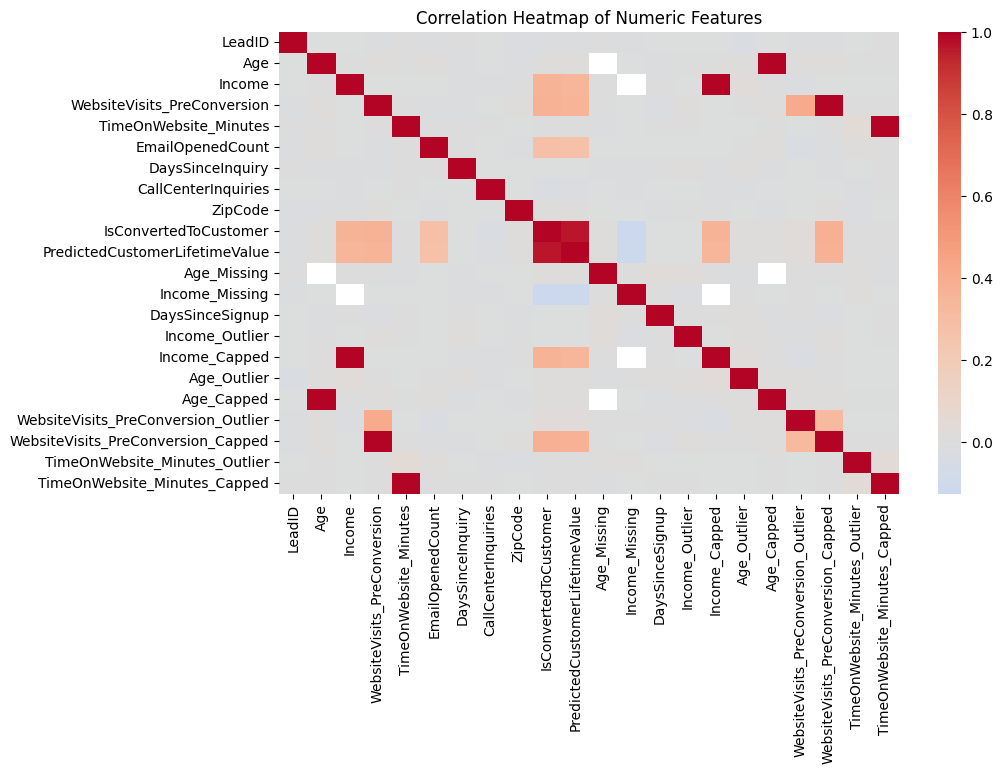

In [22]:
plt.figure(figsize=(10,6))
corr = data.corr()
sns.heatmap(corr, annot=False, cmap="coolwarm", center=0)
plt.title("Correlation Heatmap of Numeric Features")
plt.show()

### 🔍 Correlation Insights

From the heatmap of numeric features, a few key observations:

- **Engagement is Predictive**  
  Website visits, time spent on site, and email opens show moderate-to-strong positive correlation with conversion (`IsConvertedToCustomer`).  
  👉 Customers who engage more digitally are more likely to convert.

- **Income & Conversion**  
  Income has a mild positive correlation with conversion. Higher-income leads are more likely to open an account and contribute higher CLTV.  

- **CLTV Relationship**  
  `PredictedCustomerLifetimeValue` is highly correlated with both income and engagement features, which makes sense since profitable customers often engage more and have higher income.  

- **Redundancy Check**  
  Some engineered variables (like capped vs. uncapped versions) show strong correlation with their originals. For modeling, we may need to drop redundant ones to avoid multicollinearity.  

👉 **Business Implication**  
Scotiabank should focus on **high-income leads with strong engagement signals** (visits, time, emails opened). These factors together are good predictors of both **conversion probability** and **customer lifetime value**, making them critical for prioritizing leads and allocating marketing budgets.